In [1330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [1331]:
df_d = pd.read_pickle('Deals.pkl')
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21552 entries, 0 to 21593
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21552 non-null  object        
 1   Deal Owner Name      21523 non-null  object        
 2   Closing Date         14629 non-null  datetime64[ns]
 3   Quality              19308 non-null  object        
 4   Stage                21551 non-null  object        
 5   Lost Reason          16097 non-null  object        
 6   Page                 21551 non-null  object        
 7   Campaign             21552 non-null  object        
 8   SLA                  15515 non-null  object        
 9   Content              14122 non-null  object        
 10  Term                 12442 non-null  object        
 11  Source               21551 non-null  object        
 12  Payment Type         492 non-null    object        
 13  Product              3589 non-null  

In [1332]:
df_s = pd.read_pickle('Spend.pkl')
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14638 entries, 1 to 20778
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              14638 non-null  datetime64[ns]
 1   Source            14638 non-null  object        
 2   Campaign          14638 non-null  object        
 3   Impressions       14638 non-null  float64       
 4   Clicks            14638 non-null  int64         
 5   AdGroup           14638 non-null  object        
 6   Ad                14638 non-null  object        
 7   Amount            14638 non-null  float64       
 8   Currency          14638 non-null  object        
 9   Campaign_encoded  14638 non-null  int64         
 10  AdGroup_encoded   14638 non-null  int64         
 11  Ad_encoded        14638 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.5+ MB


In [ ]:
# Convert 'Initial Amount Paid' and 'Offer Total Amount' to float type
df_d['Initial Amount Paid'] = pd.to_numeric(df_d['Initial Amount Paid'], errors='coerce')
df_d['Offer Total Amount'] = pd.to_numeric(df_d['Offer Total Amount'], errors='coerce')

# Add a new column 'Sum_Paid', initializing with zeros as float type
df_d['Sum_Paid'] = 0.0

# Apply conditions: Stage = 'Payment Done', Offer Total Amount > 0, Months of study > 0
condition = (df_d['Stage'] == 'Payment Done') & (df_d['Offer Total Amount'] > 0) & (df_d['Months of study'] > 0)

# Calculate 'Sum_Paid' using the formula for rows that meet the conditions
df_d.loc[condition, 'Sum_Paid'] = (df_d['Offer Total Amount'] / df_d['Course duration'] * df_d['Months of study']).astype(float)

# Check the result
df_d[['Id', 'Stage', 'Offer Total Amount', 'Months of study', 'Course duration', 'Sum_Paid']].head()

,Id,Stage,Offer Total Amount,Months of study,Course duration,Sum_Paid
0,5805028000056864768,New Lead,NaN,NaN,NaN,0.0
1,5805028000056859648,New Lead,2000.0,NaN,6.0,0.0
2,5805028000056832000,Lost,NaN,NaN,NaN,0.0
3,5805028000056823808,Lost,NaN,NaN,NaN,0.0
4,5805028000056873984,Lost,NaN,NaN,NaN,0.0


In [ ]:
# 1. Calculate the sum of the 'Amount' column in the df_s table
total_amount_df_s = df_s['Amount'].sum()

# Output the sum of 'Amount'
print(f"Sum of the 'Amount' column in the df_s table: {total_amount_df_s}")

# 2. Filter df_d by Stage = 'Payment Done' and Months of study > 0
df_d_filtered = df_d[(df_d['Stage'] == 'Payment Done') & (df_d['Months of study'] > 0)]

# Count the number of rows after filtering
num_filtered_rows = df_d_filtered.shape[0]

# Output the number of rows
print(f"Number of rows where Stage = 'Payment Done' and Months of study > 0: {num_filtered_rows}")

# 3. Create the 'Sum_Paid' column based on the formula
df_d_filtered['Sum_Paid'] = (df_d_filtered['Offer Total Amount'] / df_d_filtered['Course duration']) * df_d_filtered['Months of study']

# Calculate the sum of the new 'Sum_Paid' column
total_sum_paid = df_d_filtered['Sum_Paid'].sum()

# Output the sum of 'Sum_Paid'
print(f"Sum of the 'Sum_Paid' column in the filtered df_d table: {total_sum_paid}")

# Calculate the sum of the 'Course duration' column
total_course_duration = df_d_filtered['Course duration'].sum()

# Calculate the sum of the 'Months of study' column
total_months_of_study = df_d_filtered['Months of study'].sum()

# Calculate the sum of the 'Offer Total Amount' column
total_offer_total_amount = df_d_filtered['Offer Total Amount'].sum()

# Output the results
print(f"Sum of 'Course duration': {total_course_duration}")
print(f"Sum of 'Months of study': {total_months_of_study}")
print(f"Sum of 'Offer Total Amount': {total_offer_total_amount}")

Сумма по столбцу 'Amount' в таблице df_s: 149523.45
Количество строк, где Stage = 'Payment Done' и Months of study > 0: 838
Сумма по столбцу 'Sum_Paid' в отфильтрованной таблице df_d: 3340287.878787879
Сумма по 'Course duration': 8533.0
Сумма по 'Months of study': 4561.0
Сумма по 'Offer Total Amount': 6323300.0


/var/folders/3f/yr1j00f96tn08rvm88vpmbsw0000gn/T/ipykernel_4699/2112445390.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_filtered['Sum_Paid'] = (df_d_filtered['Offer Total Amount'] / df_d_filtered['Course duration']) * df_d_filtered['Months of study']


In [ ]:
# Group data by campaigns and calculate the number of leads and clients with an additional condition
df_grouped = df_d.groupby('Campaign').agg(
    Leads=('Id', 'count'),  # Total number of deals
    Clients=('Stage', lambda x: ((x == 'Payment Done') & (df_d.loc[x.index, 'Months of study'] > 0)).sum()),  # Number of clients with condition
    Sum_Paid=('Sum_Paid', 'sum')  # Sum of the 'Sum_Paid' column
)

In [ ]:
# Calculate the conversion rate
df_grouped['Conversion Rate %'] = ((df_grouped['Clients'] / df_grouped['Leads']) * 100).round(2)

In [1337]:
df_grouped.head()

,Leads,Clients,Sum_Paid,Convers Rate %
Campaign,,,,
01.04.23women_PL,31,0,0.000000,0.00
02.05.24test_DE,121,1,2000.000000,0.83
02.07.23wide_DE,975,52,253706.060606,5.33
02.08.23interests_DE,8,0,0.000000,0.00
03.07.23women,610,29,155609.090909,4.75


In [ ]:
# Calculate the sum of the 'Clients' and 'Sum_Paid' columns
clients_sum = df_grouped['Clients'].sum()
sum_paid_sum = df_grouped['Sum_Paid'].sum()

# Output the results
print(f"Total Clients: {clients_sum}")
print(f"Total Sum_Paid: {sum_paid_sum}")

Сумма клиентов (Clients): 838
Сумма Sum_Paid: 3340287.878787879


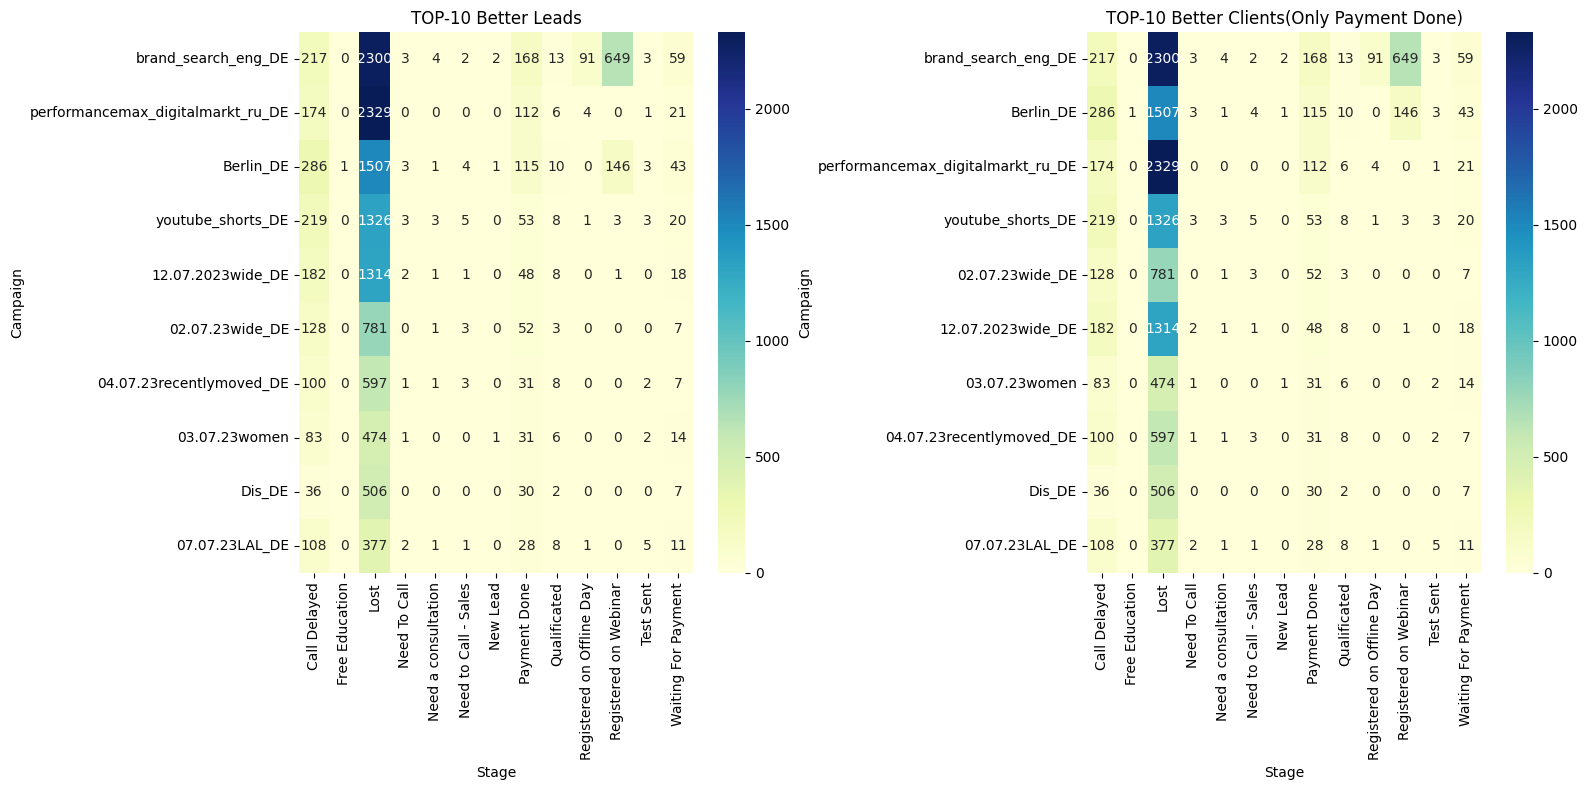

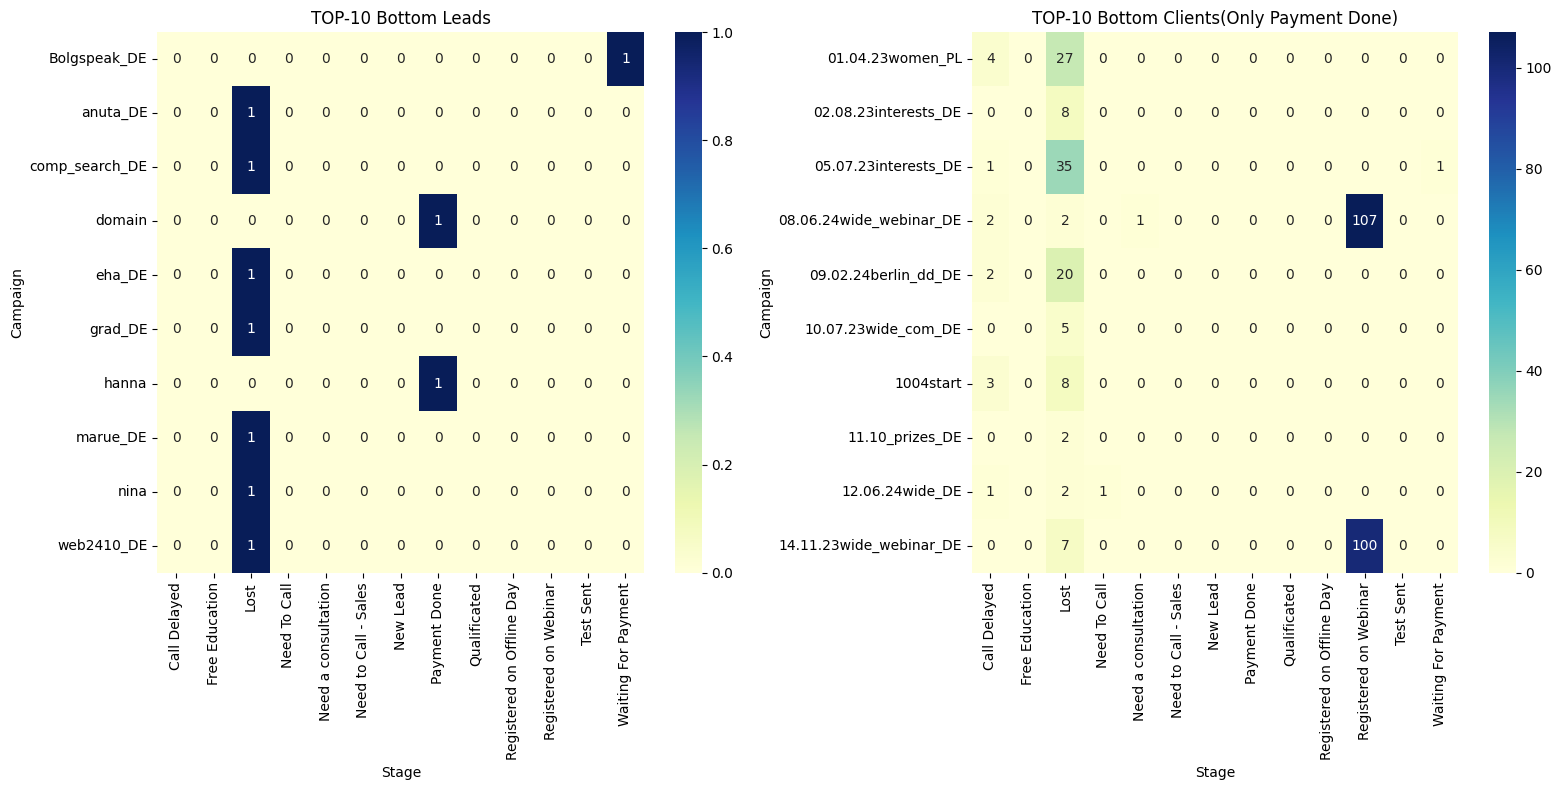

In [ ]:
# Function to create subplots
def plot_top_bottom_heatmaps(top_leads, top_clients, title_leads, title_clients):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Top 10 campaigns by leads
    sns.heatmap(df_grouped_stage.loc[top_leads], cmap="YlGnBu", annot=True, fmt='d', ax=axes[0])
    axes[0].set_title(title_leads)
    axes[0].set_xlabel('Stage')
    axes[0].set_ylabel('Campaign')

    # Top 10 campaigns by clients
    sns.heatmap(df_grouped_stage.loc[top_clients], cmap="YlGnBu", annot=True, fmt='d', ax=axes[1])
    axes[1].set_title(title_clients)
    axes[1].set_xlabel('Stage')
    axes[1].set_ylabel('Campaign')

    plt.tight_layout()
    plt.show()

# Top 10 best campaigns by leads and clients
top_10_leads = df_leads.nlargest(10).index
top_10_clients = df_clients.nlargest(10).index

# Top 10 worst campaigns by leads and clients
bottom_10_leads = df_leads.nsmallest(10).index
bottom_10_clients = df_clients.nsmallest(10).index

# Visualization of the top 10 best campaigns by leads and clients
plot_top_bottom_heatmaps(top_10_leads, top_10_clients, 'TOP-10 Best Leads', 'TOP-10 Best Clients (Only Payment Done)')

# Visualization of the top 10 worst campaigns by leads and clients
plot_top_bottom_heatmaps(bottom_10_leads, bottom_10_clients, 'TOP-10 Worst Leads', 'TOP-10 Worst Clients (Only Payment Done)')

In [ ]:
# Group data by Campaign and calculate the sum for the Amount column for each campaign
df_s_grouped = df_s.groupby('Campaign')[['Amount', 'Impressions', 'Clicks']].sum()

In [ ]:
# Calculate the sum of the columns Clients, Amount, Cost per Client, Sum_Paid, Revenue per Client
columns_to_sum = ['Clients', 'Amount', 'Cost per Client', 'Sum_Paid', 'Revenue per Client']

# Calculate the sum for each specified column
sums_merged = df_merged[columns_to_sum].sum()

# Output the results
print(sums_merged)

Clients                   838.00
Amount                 149523.45
Cost per Client         55151.79
Sum_Paid              3340287.90
Revenue per Client     231737.47
dtype: float64


In [ ]:
# Calculate the sum of the columns Clients, Amount, Cost per Client, Sum_Paid, Revenue per Client
columns_to_sum = ['Amount']

# Calculate the sum for each specified column
sums_merged = df_s_grouped[columns_to_sum].sum()

# Output the results
print(sums_merged)

Amount    149523.45
dtype: float64


In [ ]:
# Reset index for both tables and specify that the old index should not be kept
df_grouped = df_grouped.reset_index()
df_s_grouped = df_s_grouped.reset_index()

# Perform a merge using an outer join to keep all campaigns from both tables
df_merged = pd.merge(df_grouped, df_s_grouped, on='Campaign', how='outer')

# Fill any missing values with zeros if present
df_merged.fillna(0, inplace=True)

# Calculate conversion rate, cost per lead, and cost per client
df_merged['Cost per Lead'] = df_merged.apply(lambda row: row['Amount'] / row['Leads'] if row['Leads'] > 0 else np.nan, axis=1)
df_merged['Cost per Client'] = df_merged.apply(lambda row: row['Amount'] / row['Clients'] if row['Clients'] > 0 else np.nan, axis=1)
df_merged = df_merged[['Campaign', 'Impressions', 'Clicks', 'Leads', 'Clients', 'Convers Rate %', 'Amount', 'Cost per Lead', 'Cost per Client', 'Sum_Paid']]

# Calculate revenue per lead and revenue per client
df_merged['Revenue per Lead'] = df_merged.apply(lambda row: row['Sum_Paid'] / row['Leads'] if row['Leads'] > 0 else np.nan, axis=1)
df_merged['Revenue per Client'] = df_merged.apply(lambda row: row['Sum_Paid'] / row['Clients'] if row['Clients'] > 0 else np.nan, axis=1)
df_merged = df_merged.round(2)
df_merged

,Campaign,Impressions,Clicks,Leads,Clients,Convers Rate %,Amount,Cost per Lead,Cost per Client,Sum_Paid,Revenue per Lead,Revenue per Client
0,01.02.24wide_webinar_DE,20309.68,216.0,0.0,0.0,0.00,219.91,NaN,NaN,0.00,NaN,NaN
1,01.04.23women_PL,46212.00,367.0,31.0,0.0,0.00,360.08,11.62,NaN,0.00,0.00,NaN
2,02.05.24test_DE,70328.00,3204.0,121.0,1.0,0.83,504.29,4.17,504.29,2000.00,16.53,2000.00
3,02.07.23wide_DE,621136.00,10987.0,975.0,52.0,5.33,7166.00,7.35,137.81,253706.06,260.21,4878.96
4,02.08.23interests_DE,5983.00,76.0,8.0,0.0,0.00,69.30,8.66,NaN,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
155,work_wr,0.00,0.0,6.0,0.0,0.00,0.00,0.00,NaN,0.00,0.00,NaN
156,workingin_DE,0.00,0.0,48.0,0.0,0.00,0.00,0.00,NaN,0.00,0.00,NaN
157,yo_DE,0.00,0.0,13.0,0.0,0.00,0.00,0.00,NaN,0.00,0.00,NaN
158,youtube_shorts_DE,8853808.00,61749.0,1644.0,53.0,3.22,15138.26,9.21,285.63,201219.70,122.40,3796.60


In [1344]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Campaign            160 non-null    object 
 1   Impressions         160 non-null    float64
 2   Clicks              160 non-null    float64
 3   Leads               160 non-null    float64
 4   Clients             160 non-null    float64
 5   Convers Rate %      160 non-null    float64
 6   Amount              160 non-null    float64
 7   Cost per Lead       154 non-null    float64
 8   Cost per Client     68 non-null     float64
 9   Sum_Paid            160 non-null    float64
 10  Revenue per Lead    154 non-null    float64
 11  Revenue per Client  68 non-null     float64
dtypes: float64(11), object(1)
memory usage: 15.1+ KB


In [ ]:
# Calculate the sum of the columns Clients, Amount, Sum_Paid, Leads
columns_to_sum = ['Clients', 'Amount', 'Sum_Paid', 'Leads']

# Calculate the sum for each specified column
sums_merged = df_merged[columns_to_sum].sum()

# Output the results
print(sums_merged)

Clients         838.00
Amount       149523.45
Sum_Paid    3340287.90
Leads         21552.00
dtype: float64


In [ ]:
# Ensure there are no missing values
df_merged.fillna(0, inplace=True)

# Create new features
#df_merged['Profit per Lead'] = df_merged['Revenue per Lead'] - df_merged['Cost per Lead']
df_merged['Profit per Client'] = df_merged['Revenue per Client'] - df_merged['Cost per Client']

# Select features for training
features = df_merged[['Amount', 'Cost per Client', 'Revenue per Client',
                      'Profit per Client', 'Sum_Paid', 'Clients', 'Cost per Client']] # 'Leads', 'Cost per Lead',

# Target variable — Revenue per Client
target = df_merged['Clients']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an ensemble model (Stacking Regressor)
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('ridge', Ridge())
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(n_estimators=100, random_state=42)
)

# Train the ensemble model
stacking_model.fit(X_train_scaled, y_train)

# Prediction on the test set
y_pred = stacking_model.predict(X_test_scaled)

# Model accuracy evaluation
accuracy = r2_score(y_test, y_pred)
print(f'Ensemble Model Accuracy (R² score): {accuracy:.2f}')

# Now we can use the model to predict the rating for all campaigns
df_merged['Predict rating'] = stacking_model.predict(scaler.transform(features)).round(2)

# Sort campaigns by predicted revenue per client
df_merged_sorted = df_merged.sort_values(by='Predict rating', ascending=False)

Ensemble Model Accuracy (R² score): 0.99


In [ ]:
# Feature importances are calculated as the average across all base models
feature_importances = np.mean([
    stacking_model.named_estimators_['rf'].feature_importances_,
    stacking_model.named_estimators_['gbr'].feature_importances_
], axis=0)

# Output feature importances
print("Feature Importances:")
for feature, importance in zip(features.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Amount: 0.0147
Cost per Client: 0.0101
Revenue per Client: 0.0039
Profit per Client: 0.0040
Sum_Paid: 0.4281
Clients: 0.5322
Cost per Client: 0.0071


In [ ]:
# Display the first rows with the predicted rating
df_merged_sorted.head(10)

,Campaign,Impressions,Clicks,Leads,Clients,Convers Rate %,Amount,Cost per Lead,Cost per Client,Sum_Paid,Revenue per Lead,Revenue per Client,Profit per Client,Predict rating
89,brand_search_eng_DE,9283.0,2593.0,3508.0,164.0,4.68,3757.82,1.07,22.91,605942.42,172.73,3694.77,3671.86,133.94
56,Berlin_DE,0.0,0.0,2117.0,112.0,5.29,0.00,0.00,0.00,382425.76,180.65,3414.52,3414.52,123.41
124,performancemax_digitalmarkt_ru_DE,0.0,0.0,2644.0,109.0,4.12,0.00,0.00,0.00,488777.27,184.86,4484.20,4484.20,123.41
3,02.07.23wide_DE,621136.0,10987.0,975.0,52.0,5.33,7166.00,7.35,137.81,253706.06,260.21,4878.96,4741.15,52.71
158,youtube_shorts_DE,8853808.0,61749.0,1644.0,53.0,3.22,15138.26,9.21,285.63,201219.70,122.40,3796.60,3510.97,52.56
20,12.07.2023wide_DE,3368950.0,23941.0,1575.0,48.0,3.05,9601.93,6.10,200.04,173806.06,110.35,3620.96,3420.92,50.66
66,Dis_DE,0.0,0.0,580.0,29.0,5.00,0.00,0.00,0.00,145969.70,251.67,5033.44,5033.44,28.64
5,03.07.23women,358530.0,7526.0,610.0,29.0,4.75,4272.94,7.00,147.34,155609.09,255.10,5365.83,5218.49,28.56
6,04.07.23recentlymoved_DE,436897.0,8542.0,749.0,30.0,4.01,4599.66,6.14,153.32,101587.88,135.63,3386.26,3232.94,26.85
9,07.07.23LAL_DE,342065.0,5965.0,542.0,28.0,5.17,4237.86,7.82,151.35,126075.76,232.61,4502.71,4351.36,26.85


In [ ]:
# Display the last rows (worst campaigns)
df_merged_sorted.tail(10)

,Campaign,Impressions,Clicks,Leads,Clients,Convers Rate %,Amount,Cost per Lead,Cost per Client,Sum_Paid,Revenue per Lead,Revenue per Client,Profit per Client,Predict rating
74,PL_life,0.0,0.0,5.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
73,Markt_DE,0.0,0.0,2.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
71,LOST_de,0.0,0.0,7.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
70,Kak_PL,0.0,0.0,2.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
68,Genie_DE,0.0,0.0,12.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
67,Forum_DE,0.0,0.0,6.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
65,Consult_DE,0.0,0.0,7.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
64,Bolgspeak_DE,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
63,Bloggerperr_DE,0.0,0.0,2.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
159,youtube_shortsin_AT,91827.0,608.0,14.0,0.0,0.0,249.28,17.81,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1200x600 with 0 Axes>

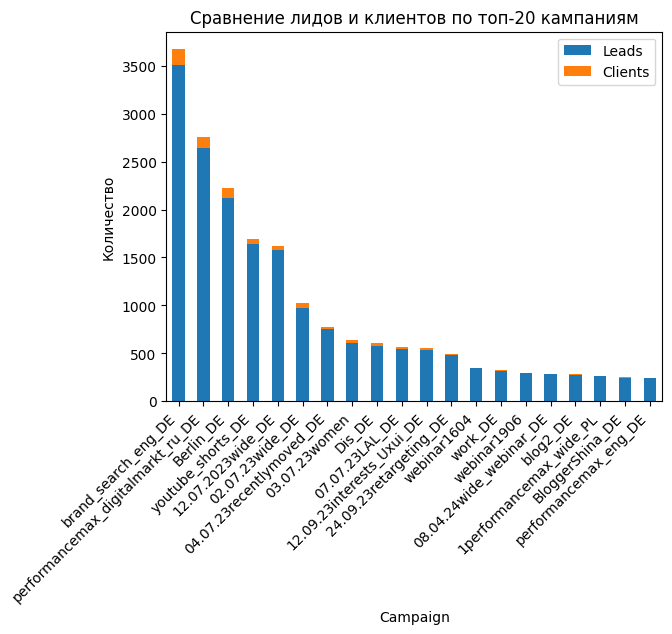

In [ ]:
# Comparison of leads and clients by campaigns
df_leads_clients = df_merged[['Campaign', 'Leads', 'Clients']].sort_values(by='Leads', ascending=False).head(20)

plt.figure(figsize=(12, 6))
df_leads_clients.set_index('Campaign')[['Leads', 'Clients']].plot(kind='bar', stacked=True)
plt.title('Comparison of Leads and Clients for Top-20 Campaigns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x600 with 0 Axes>

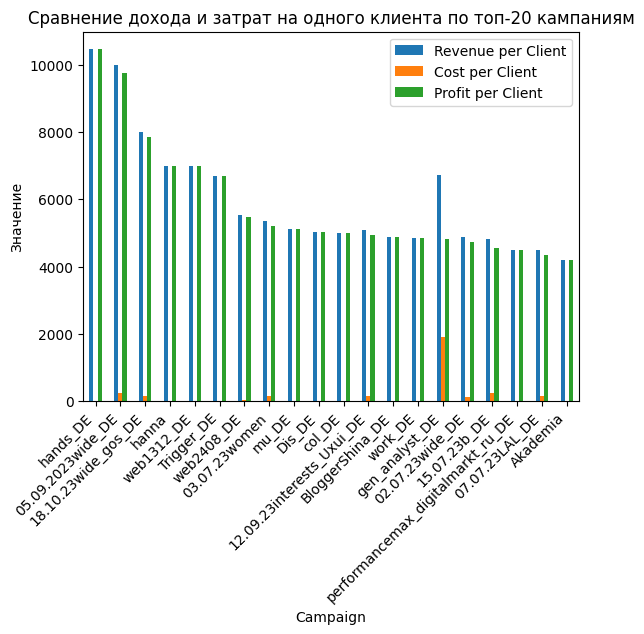

In [ ]:
# Comparison of "Revenue per Client" and "Cost per Client"
df_cost_revenue_client = df_merged[['Campaign', 'Revenue per Client', 'Cost per Client', 'Profit per Client']].sort_values(by='Profit per Client', ascending=False).head(20)

plt.figure(figsize=(12, 6))
df_cost_revenue_client.set_index('Campaign')[['Revenue per Client', 'Cost per Client', 'Profit per Client']].plot(kind='bar')
plt.title('Comparison of Revenue and Cost per Client for Top-20 Campaigns')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.show()


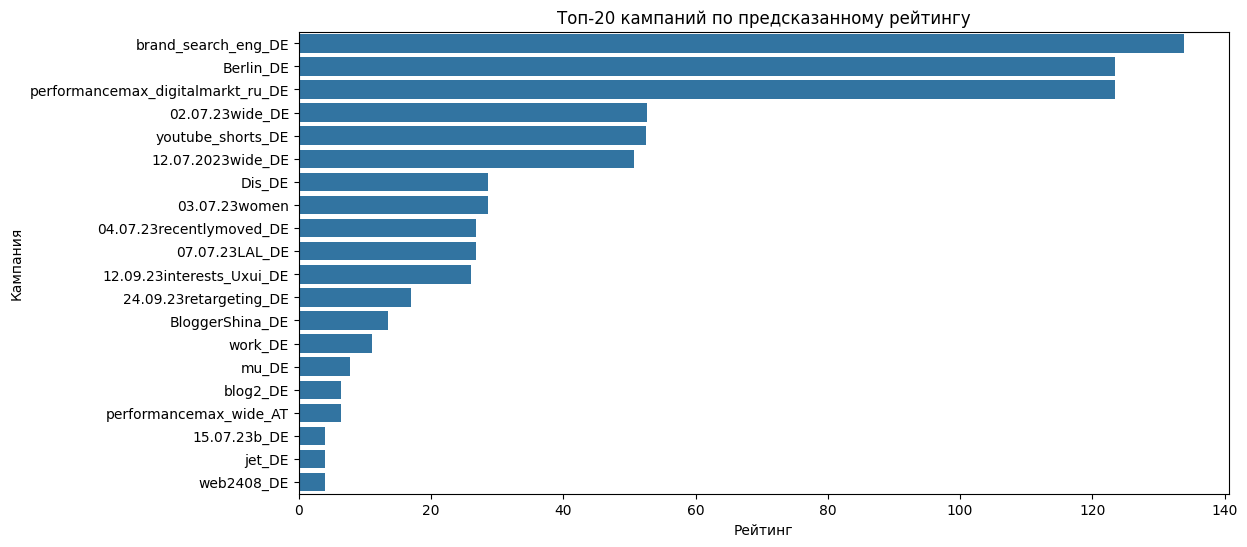

In [ ]:
# Visualization of campaign ratings
df_ratings = df_merged[['Campaign', 'Predict rating']].sort_values(by='Predict rating', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='Predict rating', y='Campaign', data=df_ratings)
plt.title('Top-20 Campaigns by Predicted Rating')
plt.xlabel('Rating')
plt.ylabel('Campaign')
plt.show()

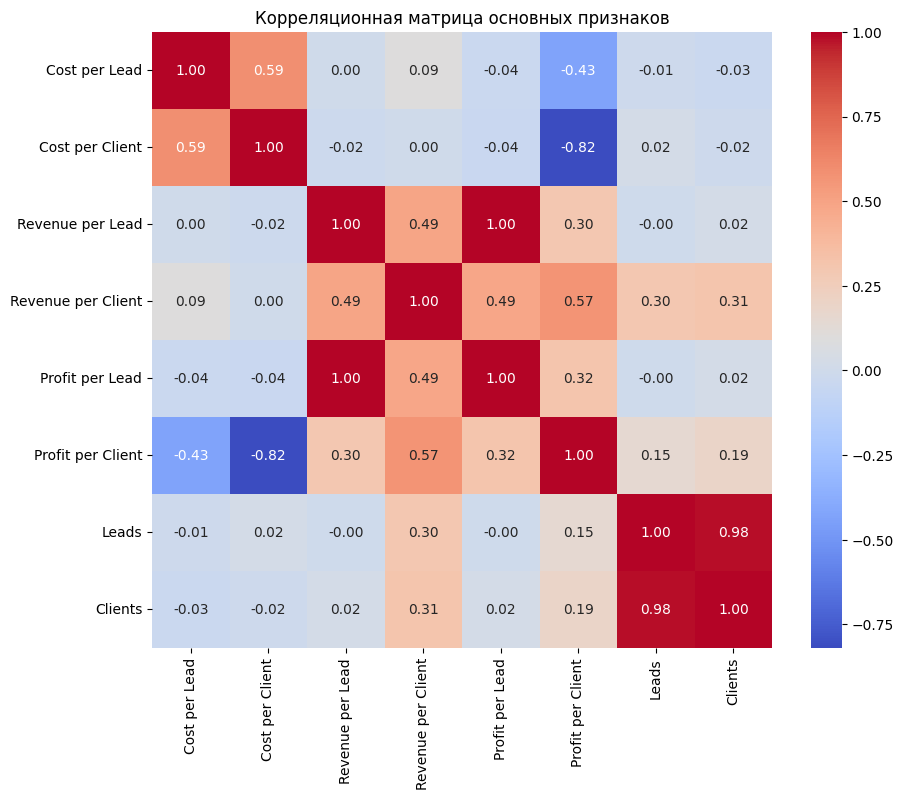

In [ ]:
# Create new features if they were not created earlier
df_merged['Profit per Lead'] = df_merged['Revenue per Lead'] - df_merged['Cost per Lead']

# Correlation matrix
features_for_corr = ['Cost per Lead', 'Cost per Client', 'Revenue per Lead', 'Revenue per Client', 
                     'Profit per Lead', 'Profit per Client', 'Leads', 'Clients']

correlation_matrix = df_merged[features_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features')
plt.show()

## Conclusions
We combined various data sets related to campaigns and aggregated data on key metrics for each campaign, such as the number of leads, clients, costs, and revenue. This allowed us to calculate financial indicators for each campaign, including cost per lead, cost per client, revenue per lead, and revenue per client.

Then, we created additional features, such as profit per lead and profit per client, which enabled a more accurate assessment of each campaign’s economic efficiency.

The analysis of costs and revenue revealed differences in the effectiveness of various campaigns in attracting leads and clients. These data were crucial for further evaluation and building predictive models. Based on the aggregated data and new features, we developed rankings for campaigns, focusing primarily on client costs and profits. This helped us identify the top 10 best and worst campaigns based on various criteria, including lead and client acquisition and financial returns.

The visualizations show significant variation among campaigns in the number of leads and clients acquired, as well as in financial performance. This demonstrates that some campaigns may generate a high number of leads but be less efficient in terms of profit per client. The data obtained in the final table exhibit more stable characteristics compared to data without machine learning used for determining campaign rankings.

This study provides a clear view of the effectiveness of different marketing campaigns. It is a valuable case for implementing in unit economics, as it helps the company evaluate not only quantitative but also qualitative results of each campaign, thereby optimizing budgets and improving profitability metrics in the future.

The key takeaway is the importance of focusing on reducing customer acquisition cost as the primary driver of successful campaigns and optimizing expenses for those campaigns where high revenue and high costs are observed. In this model, the revenue part is not clearly visible, making it challenging to determine the revenue component based on the first payment; thus, less emphasis should be placed on revenue.
Based on predicted ratings, campaigns like "brand_search_eng_DE," "Berlin_DE," and "performancemax_digitalmarkt_ru_DE" show the best results, with high revenue per client and predicted ratings.

The second chart shows comparative data on revenue and costs per client. It reveals that certain campaigns, such as "05.09.23wide_DE," "18.10.23wide_DE," and "web2403_DE," have high profit per client, indicating good economic efficiency.

The chart shows that campaigns like "brand_search_eng_DE" and "Berlin_DE" attracted the most leads and clients. However, for instance, the "youtube_shorts_DE" campaign had a high click-through rate but a low conversion to clients.

The correlation matrix demonstrates a strong relationship between the number of clients and leads, as well as between revenue and profit per client. Interestingly, there is a negative correlation between cost per client and profit per client, confirming the importance of optimizing expenses to achieve better financial performance.

In [1355]:
df_merged_sorted.to_pickle('Compaign_sum.pkl')